Assignment 4
1. Answer each of the following with True or False in the context of SVM giving reasons. [1x3=3 marks]

a) SVM classifier has quick training time with large dataset.
False, It takes more time to process large dataset.

b) SVM classifier does not perform well when number of dimensions are more than number of records.
False, It performs better when number of dimensions are more than number of records

c) SVM classifier can handle both linearly and non-linearly separable datasets.
True, SVM can handle linearly seperable items, and using Kernal and other techniques it can also handle non-linearly seperable datasets as well.


2. Do the following on breast cancer dataset. Perform 70:30 train(Tr) and test (Te) split.

Link: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original) (Links to an external site.)

a) Use Tr data for building linear SVM model and evaluate it’s performance (F1 score) using Te data. [2 marks]

b) Use the same Tr data for building polynomial SVM model and evaluate it’s performance (F1 score) using the same Te data. [2 marks]

c) Draw bar chart depicting blue bar for linear SVM and red bar for polynomial SVM, compare their performance based on precision, recall, accuracy and F1-score. [2 marks]

In [1]:
import pandas as pd
import numpy as np

In [4]:
headers = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli','Mitoses','Class']
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
data = pd.read_csv(url, header=None, names=headers, na_values = "?")
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [5]:
data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [19]:
data['Bare Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

Here we have 'nan' values to replace. As these values are categorical in nature, let us replace these nan values with median

In [20]:
data['Bare Nuclei'].fillna((data['Bare Nuclei'].median()), inplace=True)

In [21]:
data['Bare Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7.,  5.,  8.,  6.])

Now let us build the model, with features 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli','Mitoses','Class' and deleting Sample Code number as it is just id and we need not consider it

In [23]:
data = data.drop(['Sample code number'], axis = 1)

In [24]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [26]:
X = data.iloc[:,:-1].values
y= data.iloc[:,-1]

In [27]:
#Prepare train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

In [46]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [33]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [40]:
classifier = LinearSVC(max_iter = 30000)
classifier.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=30000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [55]:
y_pred = classifier.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[83  2]
 [ 1 54]]


In [43]:
f1_score(y_test, y_pred, average='weighted')

0.9786045555276323

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.99      0.98      0.98        85
           4       0.96      0.98      0.97        55

   micro avg       0.98      0.98      0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



In [65]:
from sklearn.metrics import precision_score
linear_precision = "{:.0f}".format(precision_score(y_test, y_pred, pos_label = 2, average = "binary")*100)

from sklearn.metrics import recall_score
linear_recall = "{:.0f}".format(recall_score(y_test, y_pred, pos_label = 2)*100)

from sklearn.metrics import f1_score
linear_f1 = "{:.0f}".format(f1_score(y_test, y_pred, pos_label = 2)*100)

from sklearn.metrics import accuracy_score
linear_accuracy = "{:.0f}".format(accuracy_score(y_test, y_pred)*100)
print(linear_precision, linear_recall, linear_f1,linear_accuracy )

99 98 98 98


In [48]:
poly_classifer = SVC(gamma='scale', kernel='poly', degree=3)
poly_classifer.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [66]:
y_pred = poly_classifer.predict(X_test)

In [51]:
f1_score(y_test, y_pred, average='weighted')

0.9497325914321215

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.94      0.98      0.96        85
           4       0.96      0.91      0.93        55

   micro avg       0.95      0.95      0.95       140
   macro avg       0.95      0.94      0.95       140
weighted avg       0.95      0.95      0.95       140



In [67]:
from sklearn.metrics import precision_score
poly_precision = "{:.0f}".format(precision_score(y_test, y_pred, pos_label = 2, average = "binary")*100)

from sklearn.metrics import recall_score
poly_recall = "{:.0f}".format(recall_score(y_test, y_pred, pos_label = 2)*100)

from sklearn.metrics import f1_score
poly_f1 = "{:.0f}".format(f1_score(y_test, y_pred, pos_label = 2)*100)

from sklearn.metrics import accuracy_score
poly_accuracy = "{:.0f}".format(accuracy_score(y_test, y_pred)*100)
print(poly_precision, poly_recall, poly_f1,poly_accuracy )

94 98 96 95


In [53]:
import matplotlib.pyplot as plt

In [93]:
n_groups = 4
means_linear = (linear_precision, linear_recall, linear_f1, linear_accuracy)
means_poly = (poly_precision, poly_recall, poly_f1, poly_accuracy)
#means_linear = (99, 98, 98, 98)
#means_poly = (94, 98 , 96, 95)

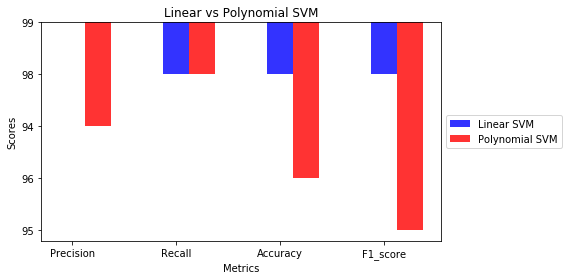

In [97]:
#Creating plot
fig, ax = plt.subplots(figsize=(8,4))
ax.YAxisLocation = 'origin';
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

rect1 = plt.bar(index, means_linear, bar_width, alpha=opacity, color = 'b', label = 'Linear SVM')
rect2 = plt.bar(index+bar_width, means_poly, bar_width, alpha=opacity, color = 'r', label = 'Polynomial SVM')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Linear vs Polynomial SVM')
plt.xticks(index, ('Precision', 'Recall','Accuracy','F1_score'))
ax.legend(loc = 'center left', bbox_to_anchor=(1,0.5))
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()